# Non-Linear SVM - Email Spam Classifier


In this section, we'll build a non-linear SVM classifier to classify emails and compare the performance with the linear SVM model.

The dataset can be downloaded here: https://archive.ics.uci.edu/ml/datasets/spambase

To reiterate, the performance of the linear model was as follows:
- accuracy 0.93
- precision 0.92
- recall 0.89

In this section, we will build a non-linear model (using non-linear kernels) and then find the optimal hyperparameters (the choice of kernel, C, gamma).

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

**Loading Data**

In [8]:
email_rec = pd.read_csv("./DataSet/Spam.csv",  sep = ',' )

## Data Preparation

In [14]:
# splitting into X and y
X = email_rec.drop("spam", axis = 1)
y = email_rec['spam'].values[1:].astype(int)

In [15]:
# scaling the features
X_scaled = scale(X[1:])

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 4)

## Model Building

In [16]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Jeswin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Model Evaluation Metrics

In [17]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[818,  30],
       [ 59, 473]], dtype=int64)

In [18]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.9355072463768116
precision 0.9403578528827038
recall 0.8890977443609023


## Hyperparameter Tuning 

Now, we have multiple hyperparameters to optimise - 
- The choice of kernel (linear, rbf etc.)
- C
- gamma

We'll use the ```GridSearchCV()``` method to tune the hyperparameters. 

## Grid Search to Find Optimal Hyperparameters

Let's first use the RBF kernel to find the optimal C and gamma (we can consider the kernel as a hyperparameter as well, though training the model will take an exorbitant amount of time). 

In [19]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   49.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [20]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.340525,0.006203,0.056447,7.412489e-03,1,0.01,"{'C': 1, 'gamma': 0.01}",0.933230,0.909938,0.922360,...,0.926708,0.010082,6,0.935947,0.942935,0.941770,0.934394,0.939053,0.938820,0.003272
1,0.462570,0.007710,0.078123,2.707495e-06,1,0.001,"{'C': 1, 'gamma': 0.001}",0.902174,0.875776,0.917702,...,0.903106,0.015670,10,0.902950,0.911491,0.902562,0.899845,0.903727,0.904115,0.003913
2,0.747061,0.015164,0.137498,6.248809e-03,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.779503,0.757764,0.804348,...,0.786957,0.018066,12,0.779891,0.797748,0.788432,0.789596,0.792314,0.789596,0.005820
3,0.340640,0.026883,0.046875,6.843901e-07,10,0.01,"{'C': 10, 'gamma': 0.01}",0.942547,0.919255,0.928571,...,0.933540,0.008640,2,0.958463,0.961957,0.963121,0.957686,0.959239,0.960093,0.002089
4,0.387208,0.060118,0.064561,9.841486e-03,10,0.001,"{'C': 10, 'gamma': 0.001}",0.928571,0.911491,0.922360,...,0.924845,0.009752,7,0.932842,0.937500,0.932065,0.929736,0.931677,0.932764,0.002580
5,0.604739,0.076130,0.107387,8.230267e-03,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.903727,0.875776,0.911491,...,0.900932,0.014547,11,0.901009,0.909161,0.899845,0.898292,0.902174,0.902096,0.003759
6,0.488405,0.029527,0.044701,3.486707e-03,100,0.01,"{'C': 100, 'gamma': 0.01}",0.927019,0.927019,0.917702,...,0.929503,0.007893,4,0.982143,0.977873,0.983307,0.980978,0.979814,0.980823,0.001879
7,0.390501,0.057543,0.047002,3.576703e-03,100,0.001,"{'C': 100, 'gamma': 0.001}",0.939441,0.919255,0.925466,...,0.931988,0.008640,3,0.942547,0.946040,0.946429,0.943323,0.945652,0.944798,0.001561
8,0.382404,0.015005,0.061802,3.765549e-03,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.930124,0.903727,0.934783,...,0.923913,0.012691,8,0.930124,0.933618,0.928571,0.926242,0.926242,0.928960,0.002756
9,0.823388,0.123890,0.041502,6.713434e-03,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.913043,0.913043,0.911491,...,0.913975,0.004348,9,0.993012,0.989519,0.992624,0.991460,0.993012,0.991925,0.001331


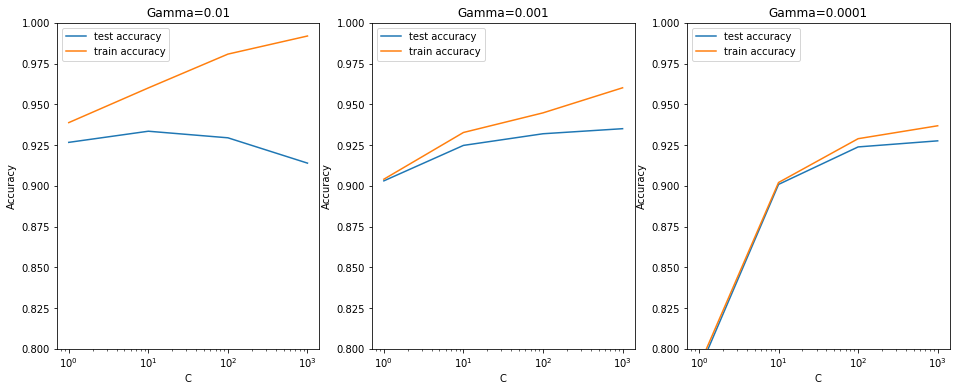

In [21]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


This plot reveals some interesting insights:
- **High values of gamma** lead to **overfitting** (especially at high values of C); note that the training accuracy at gamma=0.01 and C=1000 reaches almost 99% 
- The **training score increases with higher gamma**, though the **test scores are comparable** (at sufficiently high cost, i.e. C > 10)
- The least amount of overfitting (i.e. difference between train and test accuracy) occurs at low gamma, i.e. a quite *simple non-linear model*


In [22]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9350931677018633 corresponding to hyperparameters {'C': 1000, 'gamma': 0.001}


Though sklearn suggests the optimal scores mentioned above (gamma=0.001, C=100), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~92.5%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:
- High gamma (i.e. high non-linearity) and average value of C
- Low gamma (i.e. less non-linearity) and high value of C

We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.

### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [23]:
# specify optimal hyperparameters
best_params = {"C": 100, "gamma": 0.0001, "kernel":"rbf"}

# model
model = SVC(C=100, gamma=0.0001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))

[[814  34]
 [ 64 468]] 

accuracy 0.9289855072463769
precision 0.9322709163346613
sensitivity/recall 0.8796992481203008


## Conclusion

The accuracy achieved using a non-linear kernel is comparable to that of a linear one. Thus, it turns out that for this problem, **you do not really need a non-linear kernel**.